In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import statistics as st
import itertools as it
import pickle as pkl

import scipy
import joblib
import math
import os
import re

import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import seaborn as sns
plt.style.use('ggplot')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, auc
from sklearn.metrics import fbeta_score, make_scorer

from xgboost.sklearn import XGBRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree

from graphviz import Graph

from scipy.stats import norm

In [4]:
!pip install scikit-optimize==0.8.1

     |████████████████████████████████| 101 kB 3.6 MB/s 


In [5]:
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import BayesSearchCV

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
MLdf = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData_complete2.pkl')
MLdf.head(5)

,crossings_+-1eV,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,0.0,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.0,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,2.0,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,26.0,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


In [9]:
MLdf.isnull().sum()

crossings_+-1eV                                                              0
density                                                                      0
vpa                                                                          0
ewald_energy_per_atom                                                        0
structural complexity per cell                                               0
MagpieData minimum Number                                                    0
MagpieData maximum Number                                                    0
MagpieData minimum MendeleevNumber                                           0
MagpieData maximum MendeleevNumber                                           0
MagpieData minimum AtomicWeight                                              0
MagpieData maximum AtomicWeight                                              0
MagpieData minimum MeltingT                                                  0
MagpieData maximum MeltingT                         

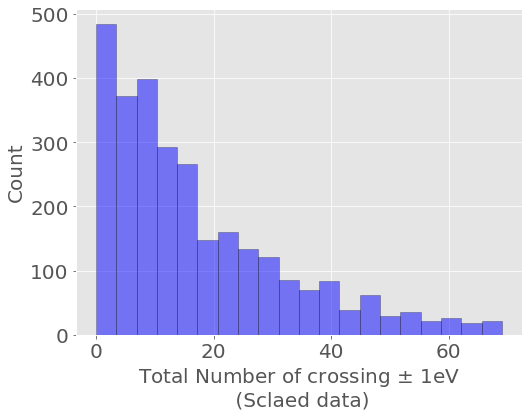

In [10]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'blue', 
         edgecolor = 'black',
         bins = 20, alpha=0.5)

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(axis='both', labelsize = 20)

In [11]:
MLdf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [12]:
len(MLdf.columns)

54

In [13]:
#preview the df
MLdf = MLdf.loc[:,~MLdf.columns.duplicated()]
MLdf.head(5)

,crossings_+-1eV,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,0.0,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.0,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,2.0,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,26.0,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


In [14]:
len(MLdf.columns)

54

In [15]:
X = MLdf.drop(['crossings_+-1eV'], axis=1)
X.head(5)

,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


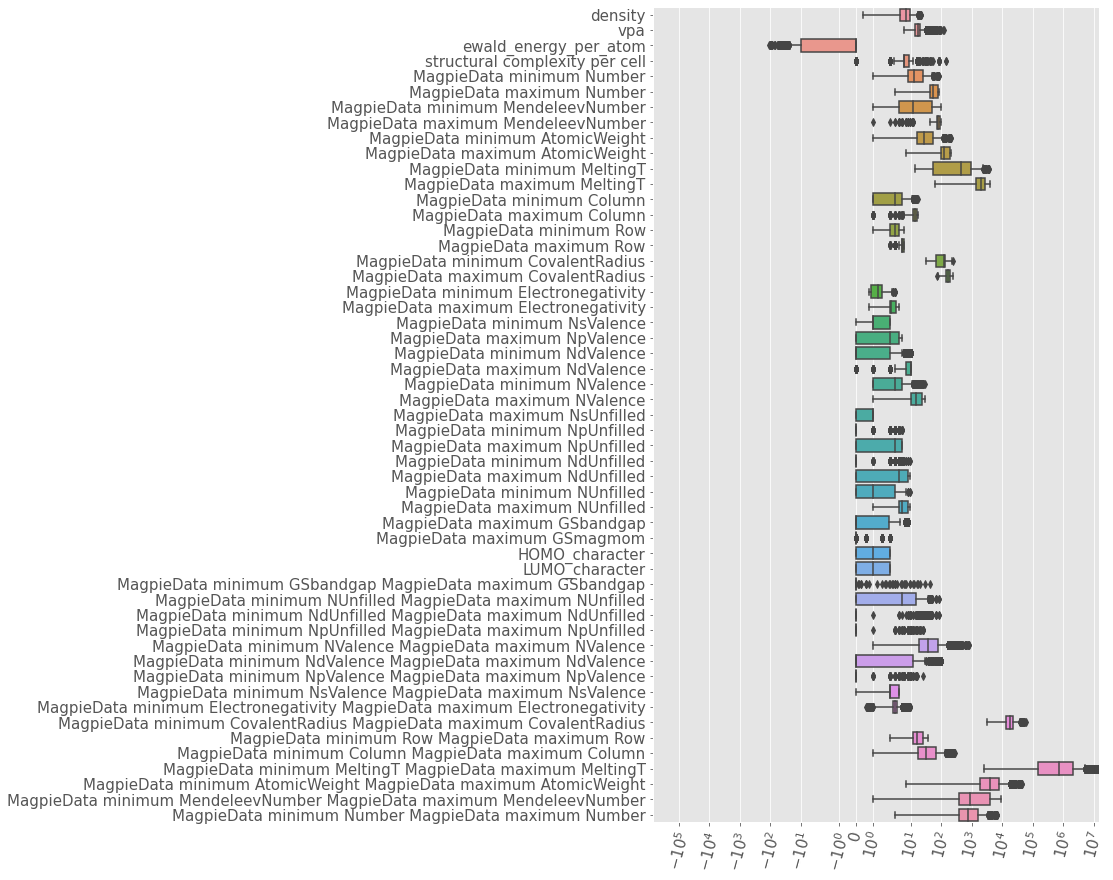

In [16]:
fig, ax = plt.subplots(figsize =(8, 15))
ax = sns.boxplot(data=X, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

In [17]:
Xscaled = StandardScaler(with_mean=True, with_std=True).fit_transform(X)
Xscaled

array([[-1.25117101, -0.40275123, -0.09624396, ..., -0.80912459,
        -0.97334375, -0.86891293],
       [-1.1504283 , -0.44366412,  0.55257777, ..., -0.62441992,
        -0.97334375, -0.65527107],
       [ 0.3361695 ,  0.36280575,  0.55257777, ...,  0.35060039,
        -0.83863413,  0.49799934],
       ...,
       [ 0.24219357,  0.28382707,  0.55257777, ..., -0.62941506,
        -0.99677151, -0.63252217],
       [-0.16704184,  0.60421355,  0.55257777, ..., -0.15683458,
         0.11116631, -0.10731927],
       [-0.91643228, -0.15451557, -0.59184187, ..., -0.6244714 ,
         1.92877003, -0.64043483]])

In [18]:
np.std(Xscaled, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [19]:
np.mean(Xscaled, axis=0)

array([ 2.09347494e-16, -5.69821580e-17, -3.09685641e-18, -1.33784197e-16,
        8.23763806e-17, -1.04054376e-16, -3.84010195e-17,  1.93243840e-16,
        9.90994053e-18,  5.71060323e-16, -5.20271878e-17, -4.70722175e-17,
        8.67119796e-18, -1.15203059e-16, -4.39753611e-17,  5.06026338e-16,
        2.35361088e-17,  2.56419711e-16,  1.01576890e-16,  2.66949023e-16,
       -4.45947324e-17, -1.73423959e-17,  2.22973662e-17, -1.76520816e-17,
        7.43245539e-17, -4.95497026e-18, -1.36261682e-16,  1.85811385e-17,
        1.09319031e-16, -6.56533560e-17,  1.09009346e-16,  7.43245539e-17,
        9.90994053e-18, -1.11486831e-17,  7.55632965e-17, -5.69821580e-17,
       -1.85811385e-17, -9.90994053e-18,  6.25564996e-17,  6.06983857e-17,
        1.67230246e-17,  1.23874257e-17, -2.47748513e-17, -1.23874257e-17,
       -1.26351742e-16,  2.32883602e-16,  2.51464741e-16, -1.18919286e-16,
       -5.82209006e-17,  2.47748513e-18,  2.00056924e-16,  9.90994053e-17,
       -7.55632965e-17])

In [20]:
Xscaled_df = pd.DataFrame(data=Xscaled, columns=list(X))
Xscaled_df.head(5)

,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,-1.251171,-0.402751,-0.096244,0.842967,-0.670283,-1.708880,-1.042238,1.090450,-0.641016,-1.643860,-0.871191,-0.105882,-0.836590,1.123476,-0.997861,-1.599833,-1.433267,0.973077,-1.172254,1.853938,-0.501901,1.508006,-0.521639,-2.071557,-0.757957,-1.252377,0.782395,-0.184582,-0.705207,-0.316451,1.106445,-0.287487,1.050620,0.539362,-0.374663,-1.079100,-1.113975,-0.065392,-0.100553,-0.314534,-0.179626,-0.696551,-0.493942,-0.168629,-0.477344,0.041338,-1.034172,-1.254831,-0.670468,-0.687949,-0.809125,-0.973344,-0.868913
1,-1.150428,-0.443664,0.552578,0.842967,-0.670283,-0.523090,-1.042238,1.090450,-0.641016,-0.565665,-0.871191,-0.230312,-0.836590,1.123476,-0.997861,-0.358404,-1.433267,-0.213263,-0.898299,1.853938,-2.240370,1.508006,-0.521639,0.669177,-0.757957,-0.844525,0.782395,-0.184582,-0.705207,-0.316451,-1.165868,-0.931133,-1.831229,0.539362,-0.374703,-1.079100,-1.113975,-0.065392,-0.790060,-0.314534,-0.179626,-0.659706,-0.493942,-0.168629,-2.188624,0.410858,-1.358121,-0.969298,-0.670468,-0.690759,-0.624420,-0.973344,-0.655271
2,0.336169,0.362806,0.552578,-0.294857,0.149079,1.107372,-0.846285,-0.760089,0.019478,1.101660,0.693037,0.004723,-0.545549,-0.646276,0.743993,0.883025,0.810422,0.107369,-0.723964,-0.027692,-0.501901,-1.087386,-0.521639,0.669177,-0.474391,1.194735,0.782395,-0.184582,-1.196949,-0.316451,-0.881829,-0.931133,-1.419536,-0.528874,-0.374703,1.243495,1.131197,-0.065392,-0.790060,-0.314534,-0.179626,-0.168437,-0.493942,-0.168629,-0.477344,-0.569408,0.865134,1.029431,-0.574419,0.322133,0.350600,-0.838634,0.497999
3,1.651491,-0.016295,0.252389,-0.294857,2.160239,1.107372,1.426763,-0.143243,2.143572,1.101660,-0.316748,-0.770909,2.073817,-0.056359,1.614920,0.883025,0.810422,-0.886591,1.218626,-0.027692,-0.501901,-0.568308,3.536028,0.669177,2.077708,1.194735,0.782395,-0.184582,1.261760,-0.316451,-1.165868,-0.287487,-0.184458,-0.528874,-0.374703,1.243495,1.131197,-0.065392,-0.359118,-0.314534,-0.179626,2.594952,3.632310,-0.168629,-0.477344,1.102801,0.217542,1.886029,1.749970,-0.469003,2.567628,

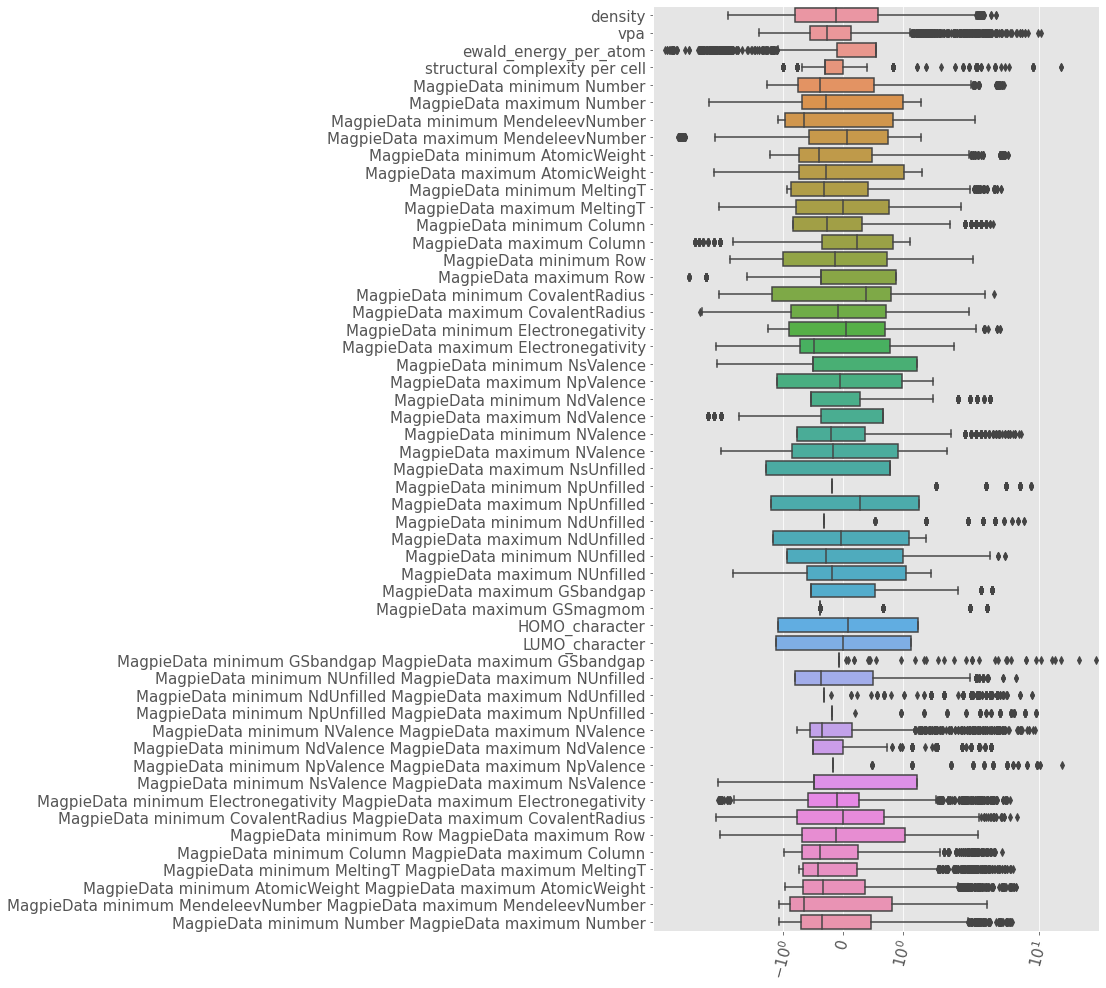

In [21]:
fig, ax = plt.subplots(figsize =(8, 17))
ax = sns.boxplot(data=Xscaled_df, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

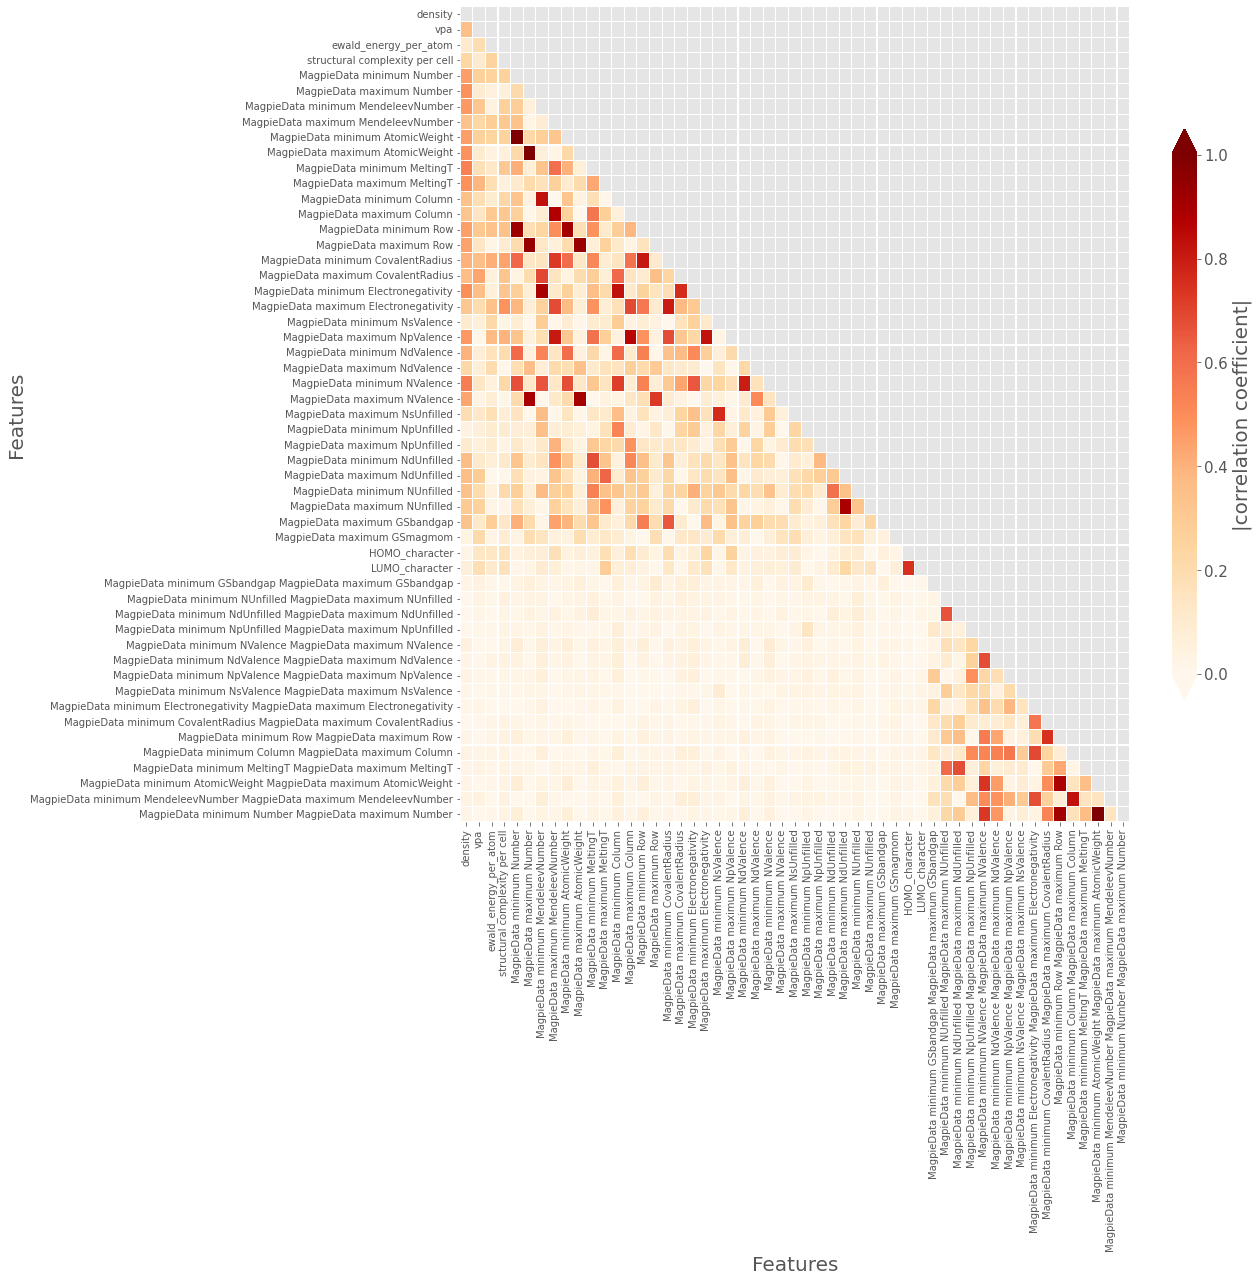

In [22]:
matrix = np.triu(Xscaled_df.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(Xscaled_df.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)

ax.set_ylabel('Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20);
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [23]:
y = MLdf['crossings_+-1eV']
y.head(5)

0     0.0
1     0.0
2     8.0
3     2.0
4    26.0
Name: crossings_+-1eV, dtype: float64

# PCA

In [24]:
pca = PCA()

In [25]:
param_grid = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
                               11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                               21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 
                               31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                               41, 42, 43, 44, 45, 46, 47, 48
                              ]}

In [26]:
search = GridSearchCV(pca, param_grid, n_jobs=-1)

In [27]:
search.fit(Xscaled_df, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=PCA(copy=True, iterated_power='auto', n_components=None,
                           random_state=None, svd_solver='auto', tol=0.0,
                           whiten=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
pca.fit(Xscaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
x_pca = pca.transform(Xscaled_df)

In [30]:
df_comp_n = pd.DataFrame(pca.components_, columns=Xscaled_df.columns)

Text(191.2, 0.5, 'PCA Features')

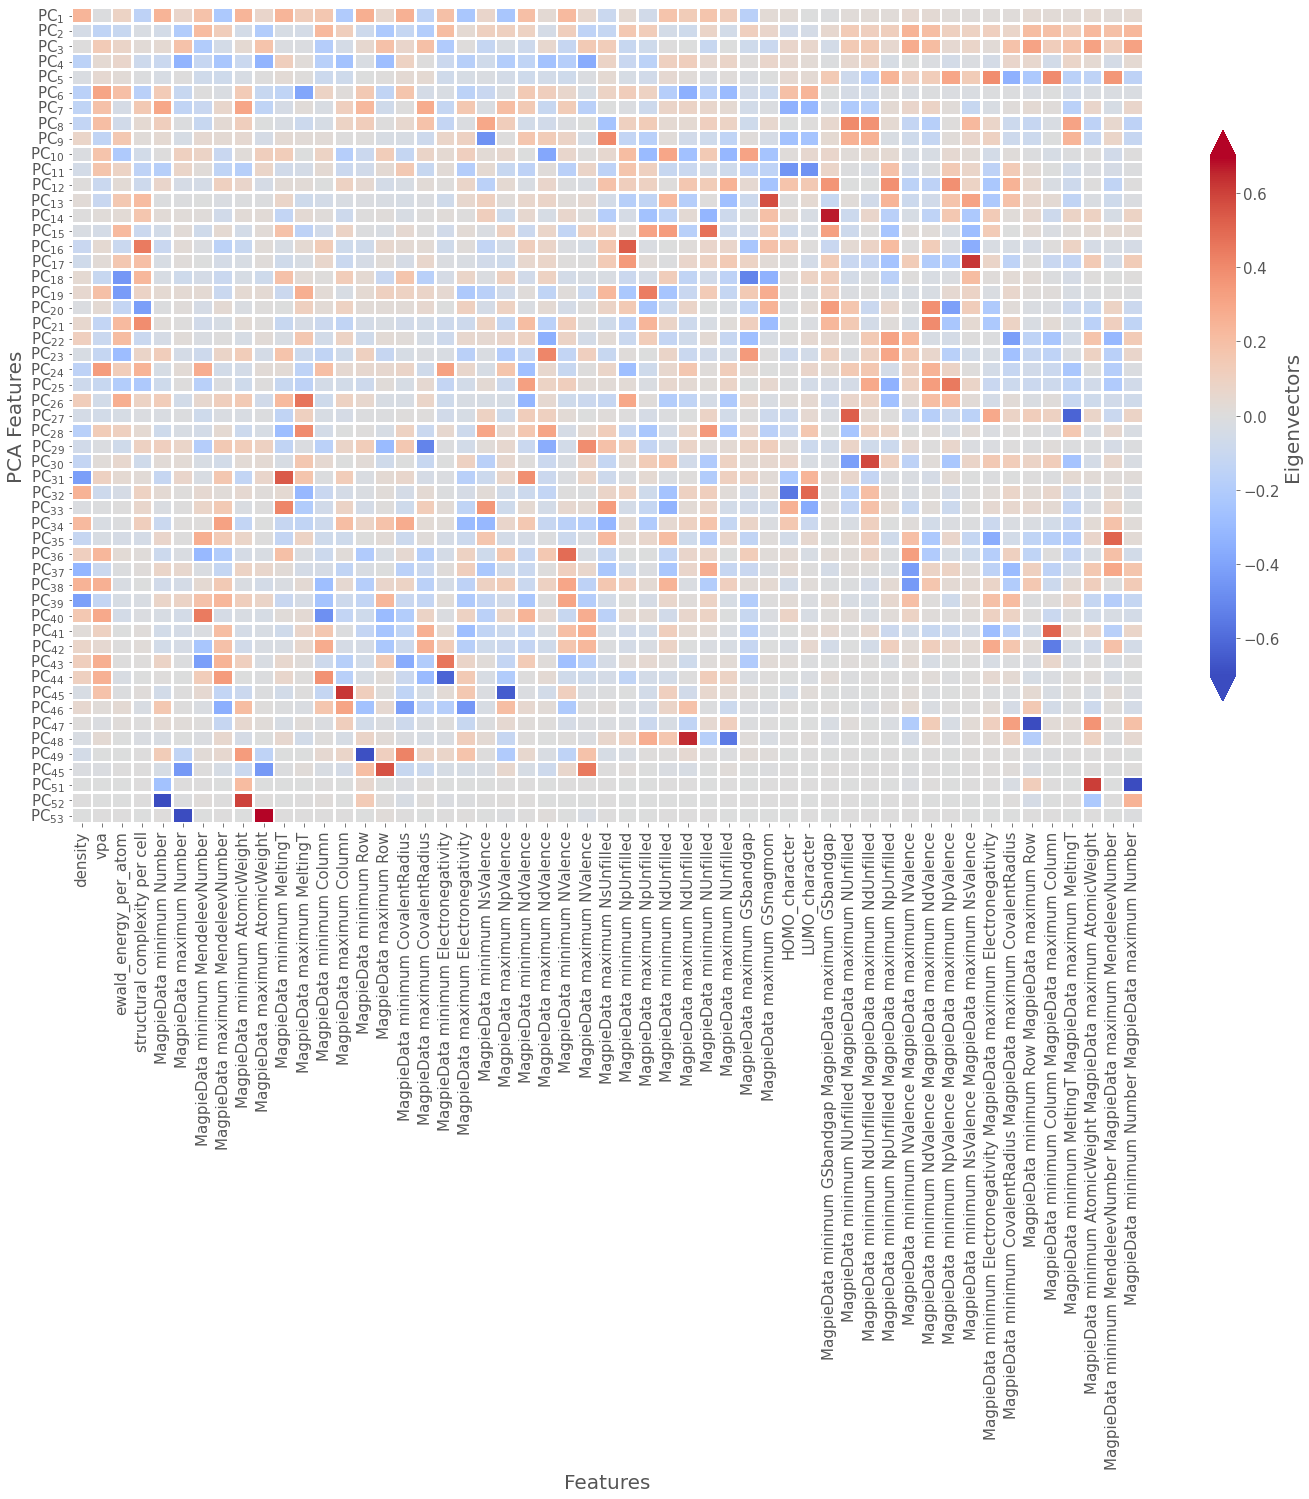

In [34]:
f, ax = plt.subplots(figsize=(24, 15))
ax = sns.heatmap(df_comp_n, 
            cmap='coolwarm', 
            linecolor='white', 
            linewidths=1.5, 
            #annot=True, 
            #annot_kws={'fontsize': 12, 
            #           #'weight': 'bold'
            #          }, 
            #fmt='.2f', 
            vmin=-0.70, 
            vmax= 0.70, 
            cbar_kws={'label': 'Eigenvectors', 'extend': 'both', 'shrink':0.7}, 
            yticklabels = ['PC$_1$','PC$_2$','PC$_3$','PC$_4$','PC$_5$','PC$_6$','PC$_7$','PC$_8$','PC$_9$',
                           'PC$_{10}$','PC$_{11}$','PC$_{12}$','PC$_{13}$','PC$_{14}$','PC$_{15}$','PC$_{16}$','PC$_{17}$','PC$_{18}$','PC$_{19}$',
                           'PC$_{20}$','PC$_{21}$','PC$_{22}$','PC$_{23}$','PC$_{24}$','PC$_{25}$','PC$_{26}$','PC$_{27}$','PC$_{28}$','PC$_{29}$',
                           'PC$_{30}$','PC$_{31}$','PC$_{32}$','PC$_{33}$','PC$_{34}$','PC$_{35}$','PC$_{36}$','PC$_{37}$','PC$_{38}$','PC$_{39}$',
                           'PC$_{40}$','PC$_{41}$','PC$_{42}$','PC$_{43}$','PC$_{44}$','PC$_{45}$','PC$_{46}$','PC$_{47}$','PC$_{48}$','PC$_{49}$',
                           'PC$_{45}$','PC$_{51}$','PC$_{52}$','PC$_{53}$'
                          ]
           )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
ax.yaxis.set_tick_params(labelsize=15, labelrotation=0)
ax.xaxis.set_tick_params(labelsize=15, labelrotation=90)
plt.xlabel('Features', fontsize=20)
plt.ylabel('PCA Features', fontsize=20)
#f.savefig('PCA_Eigenvectors_DeltaE.png', bbox_inches='tight', dpi=400);

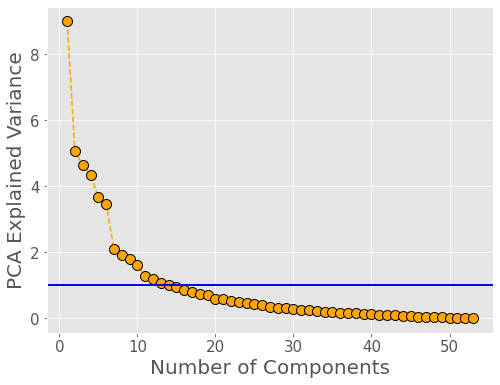

In [35]:
fig, (ax0) = plt.subplots(figsize=(8, 6))

ax0.plot(np.arange(1, pca.n_components_ + 1), 
         pca.explained_variance_,  
         '--o', 
         color='orange', 
         markersize=10, 
         markeredgecolor='k'
        )
ax0.axhline(y=1, linewidth=2, color='b')
ax0.xaxis.set_tick_params(labelsize=15)
ax0.yaxis.set_tick_params(labelsize=15)

ax0.set_xlabel('Number of Components', fontsize = 20)
ax0.set_ylabel('PCA Explained Variance', fontsize = 20);

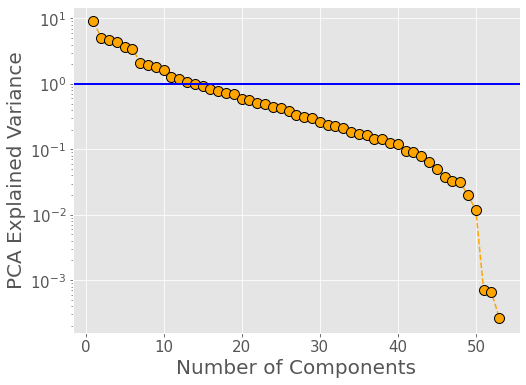

In [37]:
fig, (ax0) = plt.subplots(figsize=(8, 6))

ax0.plot(np.arange(1, pca.n_components_ + 1), 
         pca.explained_variance_, 
         '--o', 
         color='orange', 
         markersize=10, 
         markeredgecolor='k'
        )
ax0.axhline(y=1, linewidth=2, color='b')
ax0.xaxis.set_tick_params(labelsize=15)
ax0.yaxis.set_tick_params(labelsize=15)
ax0.set_yscale('log')
ax0.set_xlabel('Number of Components', fontsize = 20)
ax0.set_ylabel('PCA Explained Variance', fontsize = 20);

In [38]:
df_x_pca = pd.DataFrame(x_pca, 
                        columns=['PC$_1$','PC$_2$','PC$_3$','PC$_4$','PC$_5$','PC$_6$','PC$_7$','PC$_8$','PC$_9$',
                           'PC$_{10}$','PC$_{11}$','PC$_{12}$','PC$_{13}$','PC$_{14}$','PC$_{15}$','PC$_{16}$','PC$_{17}$','PC$_{18}$','PC$_{19}$',
                           'PC$_{20}$','PC$_{21}$','PC$_{22}$','PC$_{23}$','PC$_{24}$','PC$_{25}$','PC$_{26}$','PC$_{27}$','PC$_{28}$','PC$_{29}$',
                           'PC$_{30}$','PC$_{31}$','PC$_{32}$','PC$_{33}$','PC$_{34}$','PC$_{35}$','PC$_{36}$','PC$_{37}$','PC$_{38}$','PC$_{39}$',
                           'PC$_{40}$','PC$_{41}$','PC$_{42}$','PC$_{43}$','PC$_{44}$','PC$_{45}$','PC$_{46}$','PC$_{47}$','PC$_{48}$','PC$_{49}$',
                           'PC$_{45}$','PC$_{51}$','PC$_{52}$','PC$_{53}$']
                       )
df_x_pca.head(5)

,PC$_1$,PC$_2$,PC$_3$,PC$_4$,PC$_5$,PC$_6$,PC$_7$,PC$_8$,PC$_9$,PC$_{10}$,PC$_{11}$,PC$_{12}$,PC$_{13}$,PC$_{14}$,PC$_{15}$,PC$_{16}$,PC$_{17}$,PC$_{18}$,PC$_{19}$,PC$_{20}$,PC$_{21}$,PC$_{22}$,PC$_{23}$,PC$_{24}$,PC$_{25}$,PC$_{26}$,PC$_{27}$,PC$_{28}$,PC$_{29}$,PC$_{30}$,PC$_{31}$,PC$_{32}$,PC$_{33}$,PC$_{34}$,PC$_{35}$,PC$_{36}$,PC$_{37}$,PC$_{38}$,PC$_{39}$,PC$_{40}$,PC$_{41}$,PC$_{42}$,PC$_{43}$,PC$_{44}$,PC$_{45}$,PC$_{46}$,PC$_{47}$,PC$_{48}$,PC$_{49}$,PC$_{45}$,PC$_{51}$,PC$_{52}$,PC$_{53}$
0,-4.581533,-0.532734,-2.406170,2.090210,0.275401,-1.534572,2.621423,0.432342,0.892403,-0.267935,-0.710877,0.593012,-0.876394,-0.234700,-0.443668,0.034014,0.181144,-0.288821,-1.119971,0.124416,0.081808,1.031521,-0.591642,0.269610,0.307059,-0.106112,0.138225,-0.537913,0.822133,-0.092182,-0.033701,0.104114,0.085000,-0.106940,-0.167351,-0.168128,-0.155023,-0.070412,-0.336738,0.203976,0.174143,0.134117,-0.174083,0.169530,0.055758,0.032344,0.131807,-0.005918,0.150364,0.127414,-0.005812,0.003030,0.015039
1,-4.843308,-1.197062,-1.560400,-0.311839,0.009201,0.540449,1.488991,-1.711618,2.440675,0.149879,-0.058523,-0.597933,-0.235078,0.436207,0.949225,0.716592,-0.940050,0.058433,-1.111161,-0.356480,-0.545692,0.833644,0.794122,0.013507,-0.147073,0.694177,0.333235,0.113028,0.030215,0.266208,-0.129842,-0.516921,-0.655837,0.294245,-0.408658,0.290899,0.550588,0.090722,0.290890,-0.124974,-0.275131,-0.378934,0.326228,0.107472,-0.045581,0.255942,-0.068021,0.121053,-0.213555,-0.066759,-0.008154,-0.014846,-0.003043
2,0.585840,-2.662998,2.443989,-0.148486,-0.972827,1.508032,-1.313931,-1.425628,-0.323517,0.838613,0.007597,0.123138,0.734450,0.839470,0.012112,0.144842,-0.326348,0.662203,-0.218257,0.014511,-0.719691,-0.068542,0.281613,-0.626162,-0.514390,0.484457,-0.253784,0.332667,0.224578,-0.024521,0.030452,-0.033123,0.321389,-0.328574,-0.454911,-0.090383,0.087337,-0.317487,-0.155318,-0.286920,-0.223103,0.033894,-0.102620,0.030782,0.242809,-0.283003,-0.466563,0.121612,-0.197708,0.079106,-0.050613,-0.021610,-0.002473
3,4.803782,3.698610,3.836734,-3.775463,0.206382,2.877659,0.943490,-2.993358,-0.354371,-0.350224,-2.218781,-0.874756,-0.842510,0.036596,0.200385,0.231069,0.041377,-0.057296,0.974801,0.176054,1.540553,0.509023,-0.326850,0.303767,0.792885,-0.753007,0.310348,-0.624962,-0.003821,0.464812,-0.134679,0.058902,0.037632,-0.283735,-0.075188,-0.786603,-0.063698,-0.086888,-0.632395,-0.032059,-0.234162,-0.266498,0.259456,0.312021,-0.014208,-0.150878,0.284505,-0.139704,0.189260,-0.046733,-0.030639,-0.000112,-0.005961
4,4.098208,0.897194,-0.082602,3.817136,-0.806503,-1.715085,-1.794849,3.360581,0.088644,0.400249,-1.777835,-0.486406,2.763183,0.280016,0.739723,0.619819,-0.045404,-0.479971,-0.521970,0.654782,-0.291156,-0.326368,-0.093986,0.834727,0.860138,-0.121103,-0.043499,-0.059969,-0.417860,1.180878,0.024815,-0.007146,-0.326706,0.385055,0.322996,-0.221007,0.113827,0.134777,0.238650,-0.101053,-0.203540,-0.110809,0.182043,-0.140509,0.131289,0.019020,-0.109428,-0.059894,-0.074173,-0.015068,0.033332,0.019877,-0.016526


Text(0.5, 110.2, 'Pincipal Components')

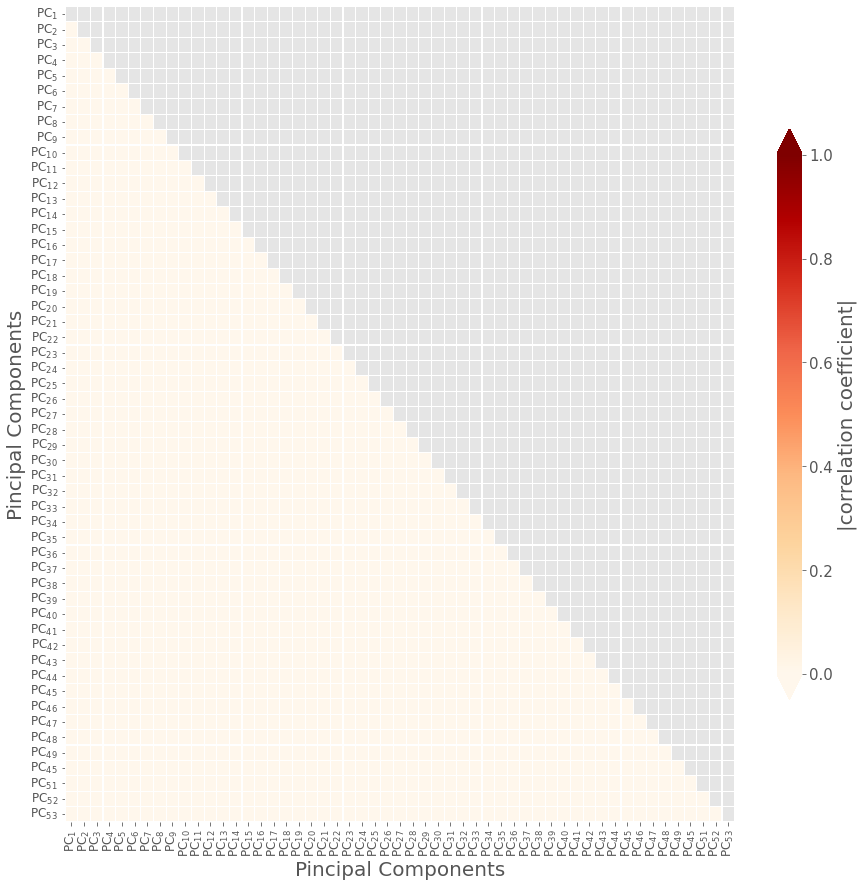

In [39]:
matrix = np.triu(df_x_pca.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_x_pca.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

ax.set_ylabel('Pincipal Components', fontsize = 20)
ax.set_xlabel('Pincipal Components', fontsize = 20)
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [89]:
x_pca_13 = df_x_pca.iloc[:,0:35]
x_pca_13.head(5)

,PC$_1$,PC$_2$,PC$_3$,PC$_4$,PC$_5$,PC$_6$,PC$_7$,PC$_8$,PC$_9$,PC$_{10}$,PC$_{11}$,PC$_{12}$,PC$_{13}$,PC$_{14}$,PC$_{15}$,PC$_{16}$,PC$_{17}$,PC$_{18}$,PC$_{19}$,PC$_{20}$,PC$_{21}$,PC$_{22}$,PC$_{23}$,PC$_{24}$,PC$_{25}$,PC$_{26}$,PC$_{27}$,PC$_{28}$,PC$_{29}$,PC$_{30}$,PC$_{31}$,PC$_{32}$,PC$_{33}$,PC$_{34}$,PC$_{35}$
0,-4.581533,-0.532734,-2.406170,2.090210,0.275401,-1.534572,2.621423,0.432342,0.892403,-0.267935,-0.710877,0.593012,-0.876394,-0.234700,-0.443668,0.034014,0.181144,-0.288821,-1.119971,0.124416,0.081808,1.031521,-0.591642,0.269610,0.307059,-0.106112,0.138225,-0.537913,0.822133,-0.092182,-0.033701,0.104114,0.085000,-0.106940,-0.167351
1,-4.843308,-1.197062,-1.560400,-0.311839,0.009201,0.540449,1.488991,-1.711618,2.440675,0.149879,-0.058523,-0.597933,-0.235078,0.436207,0.949225,0.716592,-0.940050,0.058433,-1.111161,-0.356480,-0.545692,0.833644,0.794122,0.013507,-0.147073,0.694177,0.333235,0.113028,0.030215,0.266208,-0.129842,-0.516921,-0.655837,0.294245,-0.408658
2,0.585840,-2.662998,2.443989,-0.148486,-0.972827,1.508032,-1.313931,-1.425628,-0.323517,0.838613,0.007597,0.123138,0.734450,0.839470,0.012112,0.144842,-0.326348,0.662203,-0.218257,0.014511,-0.719691,-0.068542,0.281613,-0.626162,-0.514390,0.484457,-0.253784,0.332667,0.224578,-0.024521,0.030452,-0.033123,0.321389,-0.328574,-0.454911
3,4.803782,3.698610,3.836734,-3.775463,0.206382,2.877659,0.943490,-2.993358,-0.354371,-0.350224,-2.218781,-0.874756,-0.842510,0.036596,0.200385,0.231069,0.041377,-0.057296,0.974801,0.176054,1.540553,0.509023,-0.326850,0.303767,0.792885,-0.753007,0.310348,-0.624962,-0.003821,0.464812,-0.134679,0.058902,0.037632,-0.283735,-0.075188
4,4.098208,0.897194,-0.082602,3.817136,-0.806503,-1.715085,-1.794849,3.360581,0.088644,0.400249,-1.777835,-0.486406,2.763183,0.280016,0.739723,0.619819,-0.045404,-0.479971,-0.521970,0.654782,-0.291156,-0.326368,-0.093986,0.834727,0.860138,-0.121103,-0.043499,-0.059969,-0.417860,1.180878,0.024815,-0.007146,-0.326706,0.385055,0.322996


In [90]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_13, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=1
                                                   )

In [91]:
df_y_train = pd.DataFrame(y_train)
df_y_train.head(5)

,crossings_+-1eV
2108,28.0
1173,1.0
2249,0.0
619,0.0
1198,30.0


In [92]:
df_y_test = pd.DataFrame(y_test)
df_y_test.head(5)

,crossings_+-1eV
2204,12.0
2763,6.0
1732,6.0
592,39.0
2137,25.0


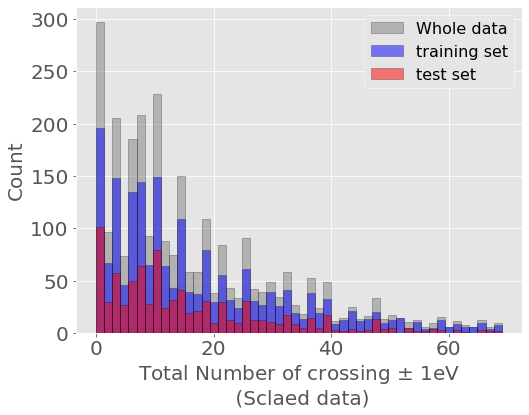

In [93]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'grey', 
         edgecolor = 'black',
         bins = 50, 
         alpha=0.5, 
         label='Whole data')

plt.hist(y_train, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 50, 
         alpha=0.5,
         label='training set')

plt.hist(y_test, 
         color = 'red', 
         edgecolor = 'black',
         bins = 50, 
         alpha=0.5, 
         label='test set')

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.tick_params(axis='both', labelsize = 20)

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [94]:
estimator = xgb.XGBRegressor()

print(estimator.get_params().keys())

param_grid   = {"booster":           ['gbtree'], 
                'objective':         ['reg:squarederror'],
                "learning_rate":     (0.01, 1.0, "uniform"), 
                "min_child_weight":  (0, 10.0, "uniform"), 
                "max_depth":         (1, 50, "uniform"), 
                "max_delta_step":    (0, 10, "uniform"), 
                "subsample":         (0.01, 1.0, "uniform"), 
                "colsample_bytree":  (0.01, 1.0, "uniform"), 
                "colsample_bylevel": (0.01, 1.0, "uniform"), 
                "reg_lambda":        (1, 1000, "uniform"), 
                "reg_alpha":         (1e-9, 1.0, "uniform"), 
                "gamma":             (1e-9, 0.5, "uniform"), 
                "min_child_weight":  (0, 10, "uniform"),  
                "scale_pos_weight":  (1, 500, "uniform")
                }

ss = ShuffleSplit(n_splits=7, test_size=0.30, random_state=0)

gbm = BayesSearchCV(estimator=estimator, 
                    search_spaces=param_grid, 
                    cv=ss, 
                    n_iter=150, 
                    n_points=10, 
                    optimizer_kwargs={'base_estimator': 'GBRT', 
                                      'acq_optimizer': 'sampling',
                                      'initial_point_generator':'grid'
                                      }, 
                    #iid=False, 
                    verbose=0, 
                    n_jobs=-1, 
                    refit=True)

gbm.fit(X_train, y_train)
best = gbm.best_estimator_;

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [95]:
estimator.importance_type

'gain'

In [96]:
df0 = pd.DataFrame(gbm.cv_results_)
df0.head(5)

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_objective,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params
0,0.147414,0.114346,0.149679,0.015679,0.124124,0.092032,0.111585,0.107837,0.042057,60,0.379284,0.011490,0.014157,0.002576,gbtree,0.2575,0.7525,0.250,0.7525,8,13,2,reg:squarederror,0.25,750,250,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.2..."
1,0.207015,0.203092,0.198478,0.109800,0.214074,0.170672,0.163718,0.180978,0.033888,5,0.602583,0.007457,0.013074,0.000365,gbtree,0.2575,0.7525,0.125,0.2575,5,26,5,reg:squarederror,0.25,500,375,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.2..."
2,0.098605,0.112020,0.143464,0.029504,0.121030,0.085476,0.075151,0.095036,0.034024,66,0.242242,0.008443,0.011185,0.003218,gbtree,0.5050,0.2575,0.250,0.5050,8,38,5,reg:squarederror,0.50,251,126,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.5..."
3,0.129942,0.136379,0.178206,0.126798,0.205314,0.105429,0.146888,0.146994,0.031429,35,0.433597,0.006995,0.015354,0.001013,gbtree,0.2575,0.5050,0.250,0.7525,8,13,2,reg:squarederror,0.50,500,126,0.5050,"{'booster': 'gbtree', 'colsample_bylevel': 0.2..."
4,0.131267,0.127756,0.146111,0.060497,0.173327,0.121578,0.107394,0.123990,0.032300,51,0.757761,0.020394,0.012684,0.000171,gbtree,0.7525,0.7525,0.125,0.2575,8,26,2,reg:squarederror,0.25,500,375,0.2575,"{'booster': 'gbtree', 'colsample_bylevel': 0.7..."


In [97]:
gbm.best_params_

OrderedDict([('booster', 'gbtree'),
             ('colsample_bylevel', 0.5976044416068855),
             ('colsample_bytree', 0.3926432618764987),
             ('gamma', 0.012771786053957927),
             ('learning_rate', 0.31000700118445973),
             ('max_delta_step', 2),
             ('max_depth', 47),
             ('min_child_weight', 9),
             ('objective', 'reg:squarederror'),
             ('reg_alpha', 0.4652544578667222),
             ('reg_lambda', 178),
             ('scale_pos_weight', 469),
             ('subsample', 0.7471980453610307)])

In [98]:
gbm.best_index_

62

In [99]:
gbm.n_splits_

7

In [100]:
gbm.multimetric_

False

The rmse train: 8.258462152753545
The rmse test: 12.867181110819223
The MAE train: 5.771657851140892
The MAE test: 9.720395527096438
The R^2 train: 0.7227150710246328
The R^2 test: 0.2125476634146508


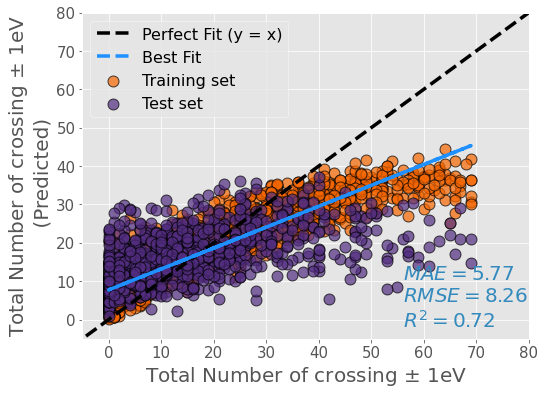

In [101]:
y_pred_train = best.predict(X_train)
y_pred_test = best.predict(X_test)

x_ref_line = [-10, 100]
y_ref_line = [-10, 100]

x_ref_line_2 = np.linspace(-10, 10, 100)
y_ref_line_2 = np.linspace(-10, 10, 100)

# Print Result and Output figure
x1 = np.array(y_train)
y1 = np.array(y_pred_train)
x2 = np.array(y_test)
y2 = np.array(y_pred_test)

print('The rmse train:', mean_squared_error(y_train, y_pred_train, squared=False))
print('The rmse test:', mean_squared_error(y_test, y_pred_test, squared=False))
print('The MAE train:', mean_absolute_error(y_train, y_pred_train))
print('The MAE test:', mean_absolute_error(y_test, y_pred_test))
print('The R^2 train:', r2_score(y_train, y_pred_train))
print('The R^2 test:', r2_score(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
#plt.fill_between(x_ref_line_2, y_ref_line_2 - 1.0, y_ref_line_2 + 1.0, 
#                 color = '#546223', alpha=0.3, label='+/- 1eV')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')
plt.plot(x1,p(x1),'--', color = 'dodgerblue', linewidth=3.5, label='Best Fit')

plt.scatter(x1, y1, s=120, c='#F56600', alpha=0.7, edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='#522D80', alpha=0.7, edgecolors='k', linewidths=1, label='Test set')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
plt.ylabel('Total Number of crossing $\pm$ 1eV \n (Predicted)', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(-5, 80)
plt.ylim(-5, 80);
text_kwargs = dict(fontsize=20, 
                   #ha='center', 
                   #va='center', 
                   color='C1'
                  )

plt.text(56, -2, 
         (r'$MAE={:.2f}$' + '\n' + r'$RMSE={:.2f}$' + '\n' + r'$R^2={:.2f}$').format(mean_absolute_error(y_train, y_pred_train), 
                                                                                               mean_squared_error(y_train, y_pred_train, squared=False), 
                                                                                               r2_score(y_train, y_pred_train)
                                                                                              ), **text_kwargs
        );

In [102]:
residuals_training = [y_train_i - y_pred_train_i for y_train_i, y_pred_train_i in zip(y_train, y_pred_train)]
#error_training

In [103]:
residuals_testing = [y_test_i - y_pred_test_i for y_test_i, y_pred_test_i in zip(y_test, y_pred_test)]
#error_testing

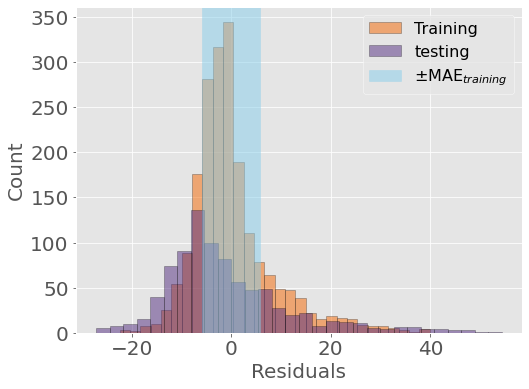

In [104]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(residuals_training, 
         color = '#F56600', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='Training')

plt.hist(residuals_testing, 
         color = '#522D80', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='testing')

ax.axvspan(-mean_absolute_error(y_train, y_pred_train), 
            mean_absolute_error(y_train, y_pred_train), 
            alpha=0.5, 
            color='skyblue', 
            label='$\pm$MAE$_{training}$')

plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.xlabel('Residuals', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.tick_params(axis='both', labelsize = 20)